In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

(-0.5, 999.5, 599.5, -0.5)

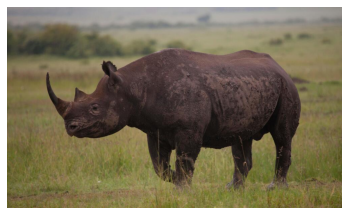

In [2]:
img = cv2.imread('TestImg.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

In [3]:
ibw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sig = ibw[0]

<Figure size 2160x1440 with 0 Axes>

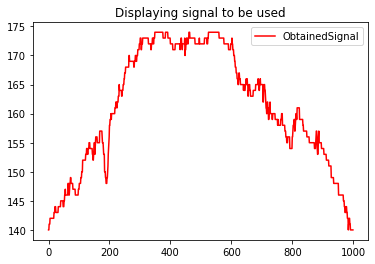

<Figure size 2160x1440 with 0 Axes>

In [6]:
L = range(len(sig))
plt.plot(L, sig, 'r', label="ObtainedSignal")
plt.title('Displaying signal to be used')
plt.legend(loc="upper right")
plt.figure(figsize=(30,20))

In [32]:
def DFT(x):
    N = len(x)
    Xout = []
    X = 0 + 0j
    for k in range(N):
        X = 0 + 0j
        for n in range(N):
            X = X + ( x[n] * ( (math.cos(2*math.pi*(1/N)) * (k * n)) - ( 1j*(math.sin(2*math.pi*(1/N)) * (k * n)) ) ) )
        Xout.append(X)
    
    Xout = np.asarray(Xout)
    return Xout

In [33]:
DFT = DFT(sig)

In [34]:
def invsDFT(X):
    N = len(X)
    xout = []
    for n in range(N):
        x = 0
        for k in range(N):
            x = x + ( X[k] * ( (math.cos(2*math.pi*(1/N)) * (k * n)) + ( 1j*(math.sin(2*math.pi*(1/N)) * (k * n)) ) ) )
        x = x/N
        xout.append(x)
        
    xout = np.asarray(xout)
    return xout    

In [51]:
DFT[32]

(2571844848.9824357-16159590.419717912j)

In [35]:
sighat = invsDFT(DFT)

In [43]:
sighat[1].real

26750406859622.992

In [48]:
sighat[33].imag

-5.995941534638405e-05

<Figure size 2160x1440 with 0 Axes>

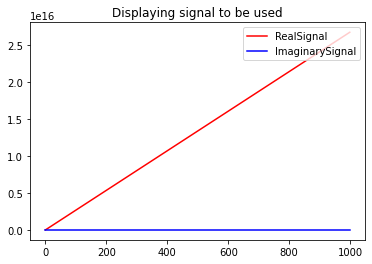

<Figure size 2160x1440 with 0 Axes>

In [49]:
L = range(len(sighat))
plt.plot(L, sighat[L].real, 'r', label="RealSignal")
plt.plot(L, sighat[L].imag, 'b', label="ImaginarySignal")
plt.title('Displaying signal to be used')
plt.legend(loc="upper right")
plt.figure(figsize=(30,20))